# HW 2: Predict Customer Churn

    (i) Exploratory Data Analysis (EDA) and Data Cleaning
    (ii) Analysis of features
    (iii) Testing of different models
    (iv) Improvements to models 
   

In [1]:
# -*- coding:utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import division
from math import sqrt
%matplotlib inline

### Exploratory Data Analysis

In [2]:
filepath = './WA_Fn-UseC_-Telco-Customer-Churn.csv'
data = pd.read_csv(filepath)
features = list(data)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Customer churn data features
print(features)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [4]:
#Shape
#7043 records, 21 features
print("Rows:" + str(data.shape[0]))
print("Columns:" + str(data.shape[1]))

Rows:7043
Columns:21


In [5]:
#Basic statistical summary of data set (for numerical features)
data.describe()

#SeniorCitizen is binary and the statistical description of that feature is not significant
#Also, the feature 'TotalCharges' is left out when we run the describe function
#It seems that 'TotalCharges' was parsed as a 'str' type

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### We will do some data cleaning of the data

### Data Cleaning

### Dealing with empty data cells

    There are value in the 'TotalCharges' column that are empty.
    We need to consider if we should remove that row of data or replace the empty cell with an appropriate value.

In [6]:
# Here we can see that there are rows whereby the 'TotalCharges' value is empty
data[data['TotalCharges']==' ']



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


#### Analysis of rows with missing data  
   Notice that if the 'TotalCharges' are empty for the rows above, the tenure is always equals to 0.
   
   Hence, we can infer that these customers have only just started their Telco plans and have yet to pay the first month's bills
   
#### To remove or not to remove the row?
   It makes more sense to replace the empty cells for the 'TotalCharges' column with a value of 0 instead of removing the entire row as the data is not 'missing' per se but instead, it is the customer that has yet to pay the first month's bills, hence the 'TotalCharges' thus far is logically 0.
   

In [7]:
# The code below will  convert the 'TotalCharges' column to a numerical value and replace the missing data with 0.0

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data = data.fillna(0.0)
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# Should we do Discretization of continuous data (e.g. tenure, monthly/total charges)?

Discretization of continuous data may seem tempting, but most of the time we do discretization when we have an understanding on the scale of aggregation i.e. we know how many bins/groups we want, and we know the "categorization function" that can be applied to "group" these values. 
    
For example, if we want to discretize a continuous attribute like "weight" and "height", we can classify them into groups such as "underweight, acceptable, overweight" based on an official scale for BMI e.g. If your BMI is less than 18.5, it falls within the underweight range. If your BMI is 18.5 to <25, it falls within the normal. If your BMI is 25.0 to <30, it falls within the overweight range. If your BMI is 30.0 or higher, it falls within the obese range.
    
Another example can be "age", where we can classify into "Underage (below 18), adult (above 18), senior citizen (above 65)".
    
For our Telco data set, we do not have any information on how we should discretize the continuous variables. For instance, if we want to discretize "tenure" into equal widths, we have no understanding what each bins represent. Does a "tenure" in the range of "0-10" months make me a short-term customer? Or perhaps a new customer? Does a "tenure" in the range of "60-70" make me a long withstanding customer? There is no justification as to why these bins and their cutoff points are decided in this way.
    
Simply doing "equal width intervals" or "equal frequency intervals" amounts to simply "Crude Binning" for the sake of discretizing the data. 
    
Also, discretization usually leads to a "loss of information in the predictors"[1], and we are also "assuming that the relationship between the predictor and the response is flat within intervals; this assumption is far less reasonable than a linearity assumption in most cases" [1]. For example, if we carelessly group those of "tenure" in the range of "0-10" in one bin together, we are assuming that the "tenures" of all the values 0 to 10 have an equal impact on the "Churn". We are excluding possibillities that customers with different "tenurs" in this bin have different weights on deciding the "Churn".
    
### Hence, we will not discretize the data for the reasons stated above.
    
[1] Harrel, F (10 Apr 2018) Problems Caused by Categorizing Continuous Variables, Retrieved from: http://biostat.mc.vanderbilt.edu/wiki/Main/CatContinuous

# Some visualizations on the data

In [8]:
def makeViz3(colName):
    labels = data[colName].unique()
    sizes = []
    for val in labels:
        sizes.append(len(data[data[colName]==val]))
    explode = (0, 0, 0.1)

    plt.figure(figsize=(15,7))
    plt.subplot(1,2,1)
    plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title(colName + "Percentage")


    plt.subplot(1,2,2)
    ax = plt.bar(np.arange(3), sizes, align='center',
              tick_label = labels)
    plt.title(colName + "Breakdown")
    ax[1].set_color('orange')
    ax[2].set_color('green')

    plt.show()

In [9]:
def makeViz2(colName):
    labels = data[colName].unique()
    sizes = []
    for val in labels:
        sizes.append(len(data[data[colName]==val]))
    explode = (0, 0.1)

    plt.figure(figsize=(15,7))
    plt.subplot(1,2,1)
    plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title(colName + "Percentage")


    plt.subplot(1,2,2)
    ax = plt.bar(np.arange(2), sizes, align='center',
              tick_label = labels)
    plt.title(colName + "Breakdown")
    ax[1].set_color('orange')

    plt.show()

In [10]:
def makeViz4(colName):
    labels = data[colName].unique()
    sizes = []
    for val in labels:
        sizes.append(len(data[data[colName]==val]))
    explode = (0, 0, 0.1, 0)

    plt.figure(figsize=(19,9))
    plt.subplot(1,2,1)
    plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title(colName + "Percentage")


    plt.subplot(1,2,2)
    ax = plt.bar(np.arange(4), sizes, align='center',
              tick_label = labels)
    plt.title(colName + "Breakdown")
    ax[1].set_color('orange')
    ax[2].set_color('green')
    ax[3].set_color('red')
    font = {'family' : 'DejaVu Sans','size': 7}
    plt.rc('font', **font)

    plt.show()

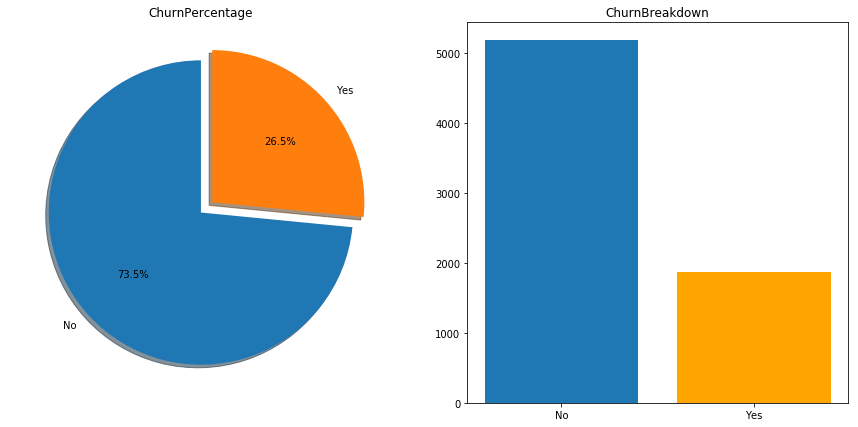

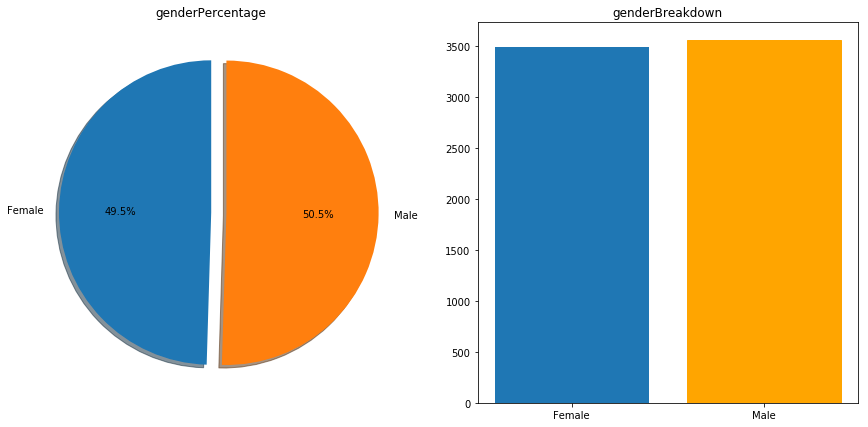

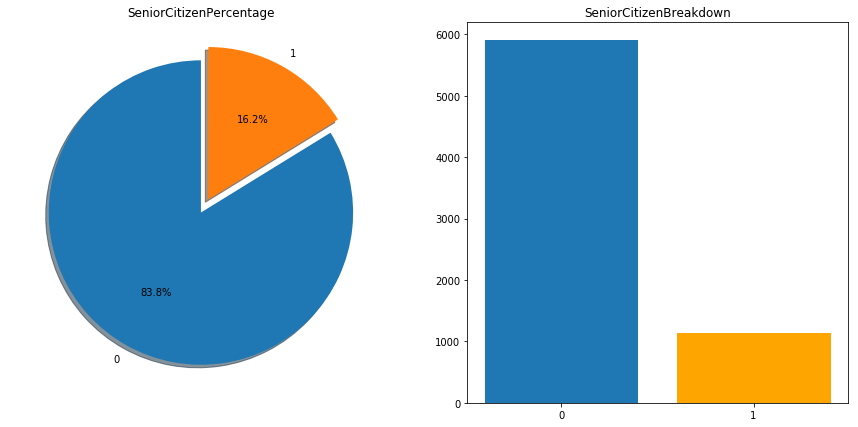

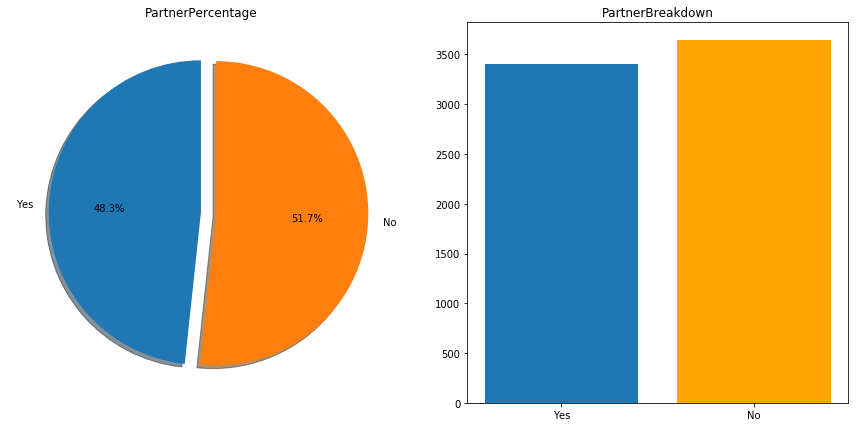

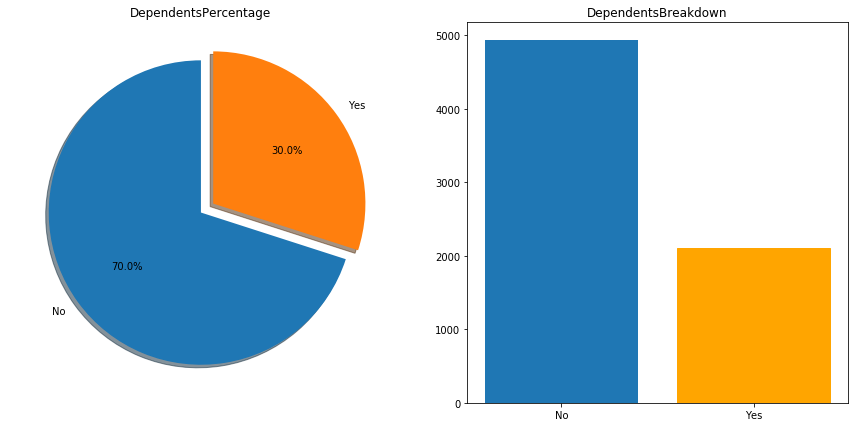

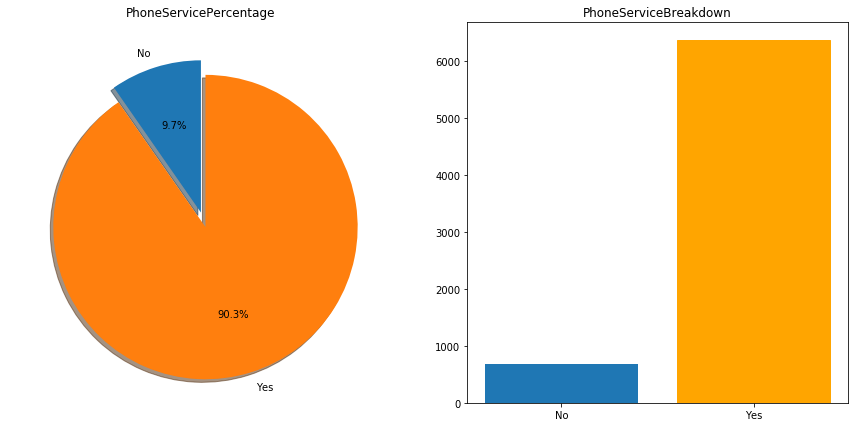

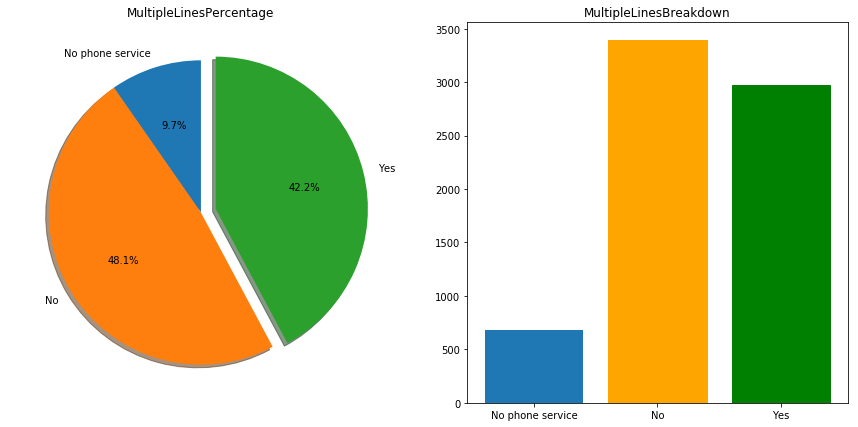

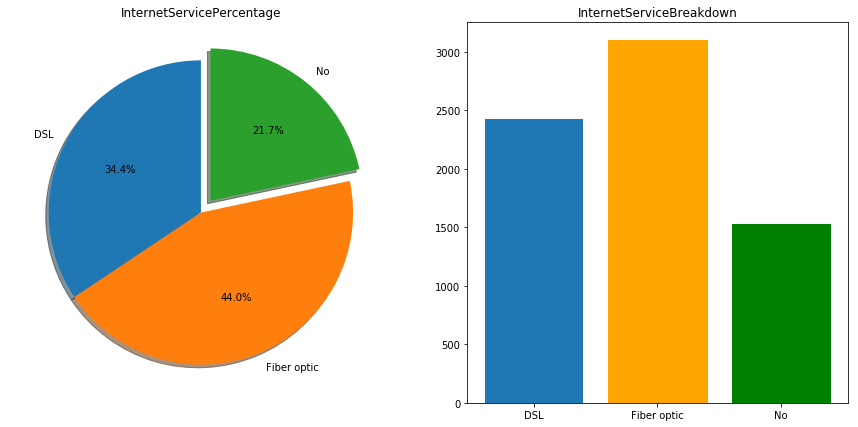

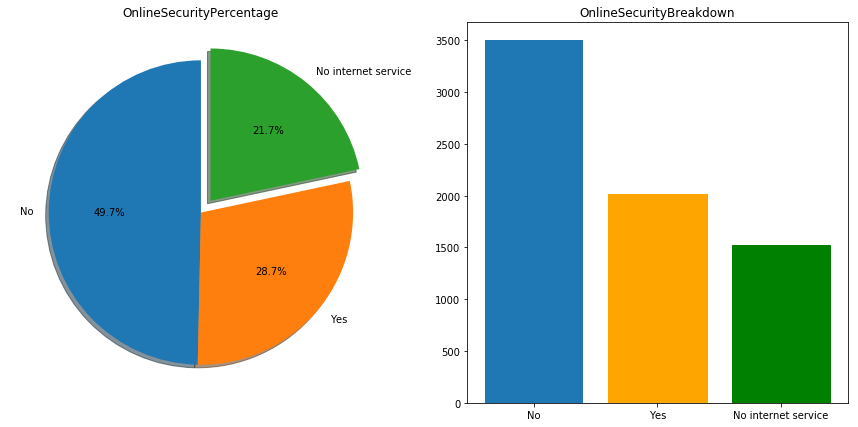

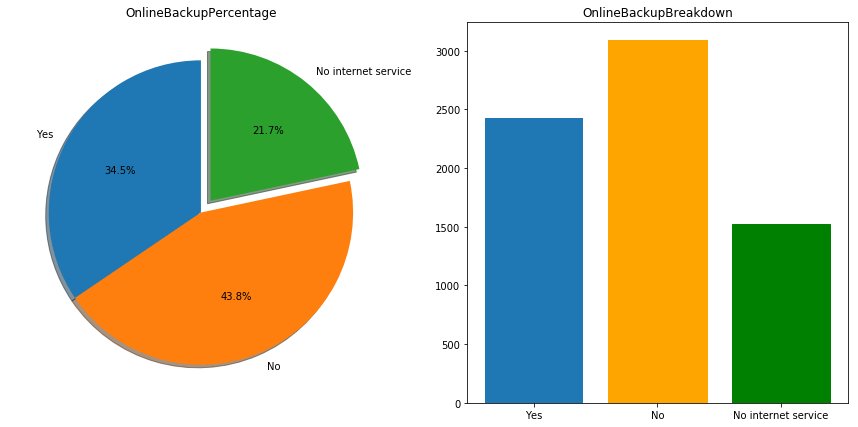

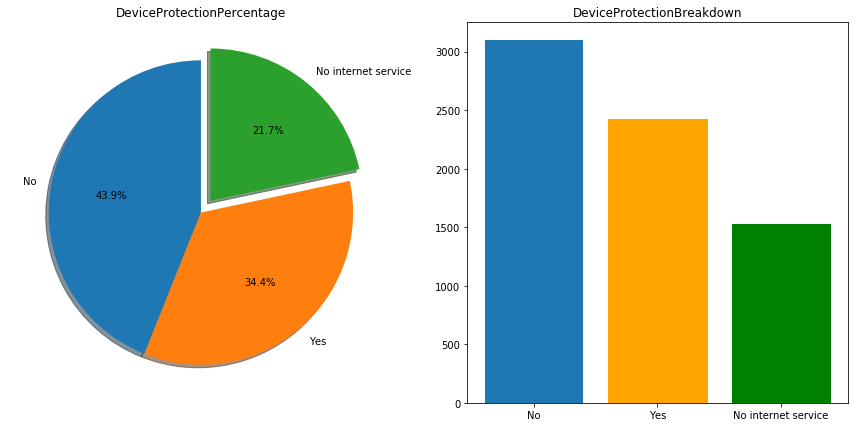

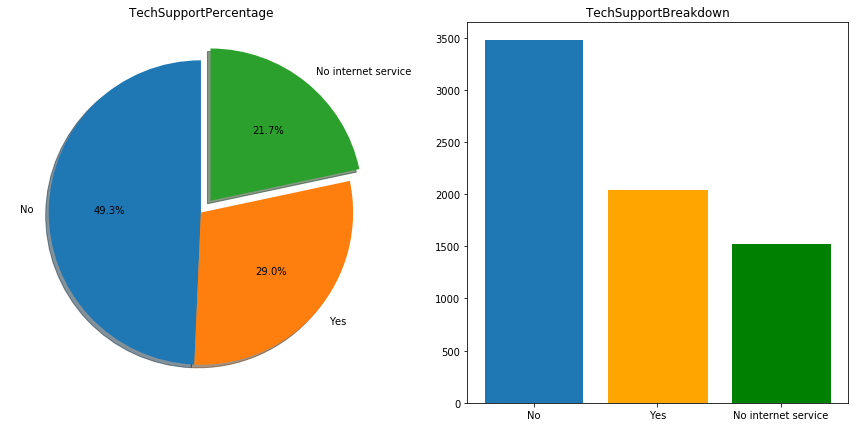

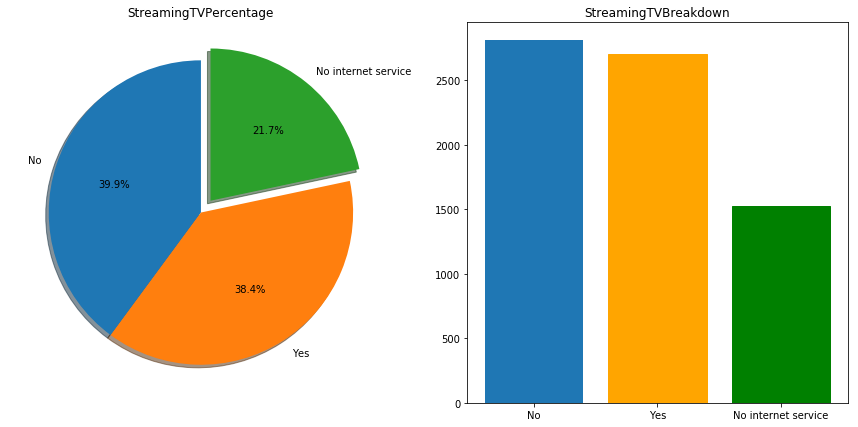

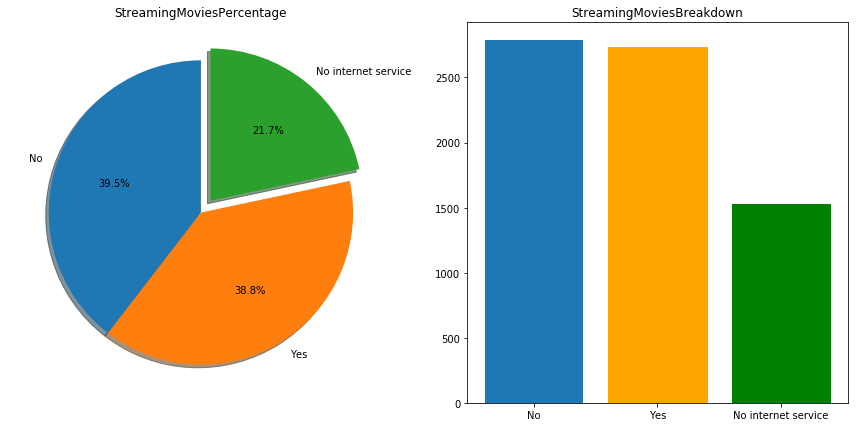

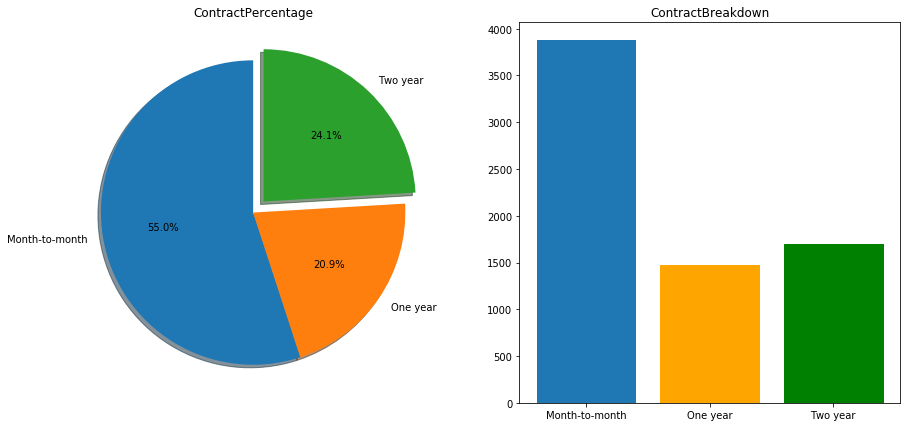

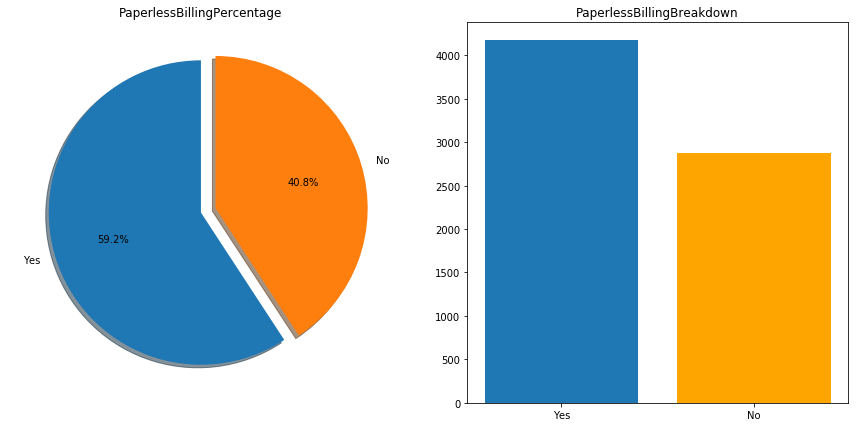

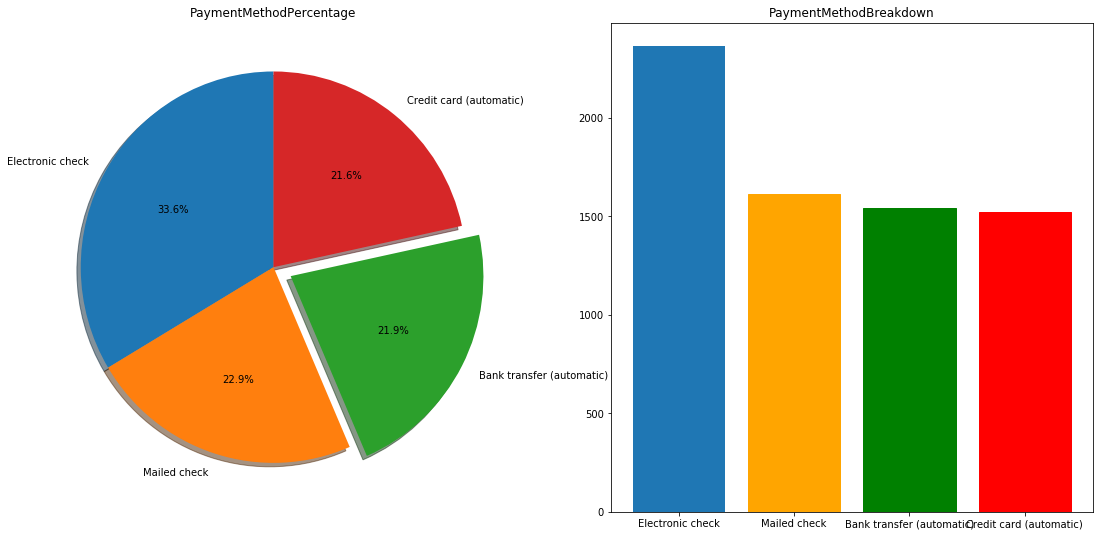

In [11]:
makeViz2('Churn')
makeViz2('gender')
makeViz2('SeniorCitizen')
makeViz2('Partner')
makeViz2('Dependents')
makeViz2('PhoneService')
makeViz3('MultipleLines')
makeViz3('InternetService')
makeViz3('OnlineSecurity')
makeViz3('OnlineBackup')
makeViz3('DeviceProtection')
makeViz3('TechSupport')
makeViz3('StreamingTV')
makeViz3('StreamingMovies')
makeViz3('Contract')
makeViz2('PaperlessBilling')
makeViz4('PaymentMethod')

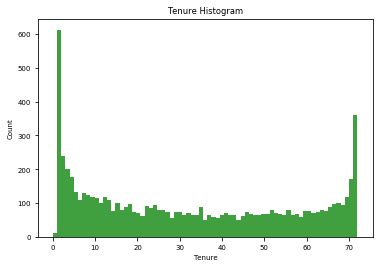

Individual values for each bin: 
0: 11.0
1: 613.0
2: 238.0
3: 200.0
4: 176.0
5: 133.0
6: 110.0
7: 131.0
8: 123.0
9: 119.0
10: 116.0
11: 99.0
12: 117.0
13: 109.0
14: 76.0
15: 99.0
16: 80.0
17: 87.0
18: 97.0
19: 73.0
20: 71.0
21: 63.0
22: 90.0
23: 85.0
24: 94.0
25: 79.0
26: 79.0
27: 72.0
28: 57.0
29: 72.0
30: 72.0
31: 65.0
32: 69.0
33: 64.0
34: 65.0
35: 88.0
36: 50.0
37: 65.0
38: 59.0
39: 56.0
40: 64.0
41: 70.0
42: 65.0
43: 65.0
44: 51.0
45: 61.0
46: 74.0
47: 68.0
48: 64.0
49: 66.0
50: 68.0
51: 68.0
52: 80.0
53: 70.0
54: 68.0
55: 64.0
56: 80.0
57: 65.0
58: 67.0
59: 60.0
60: 76.0
61: 76.0
62: 70.0
63: 72.0
64: 80.0
65: 76.0
66: 89.0
67: 98.0
68: 100.0
69: 95.0
70: 119.0
71: 170.0
72: 362.0


In [12]:
#Tenure histogram
import math
tenure = data['tenure']
num_bins = len(list(tenure.unique()))

n, bins, patches = plt.hist(tenure, num_bins, facecolor='green', alpha=0.75)


plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Tenure Histogram')


plt.show()

print("Individual values for each bin: ")
for i in range(len(n)):
    print(str(math.ceil(bins[i]))+": "+str(n[i]))



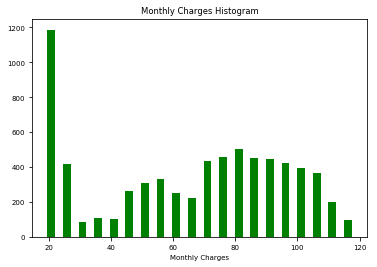

In [13]:
#Monthly Charges histogram

monthly = data['MonthlyCharges']
num_bins = 20

n, bins, patches = plt.hist(monthly, num_bins, facecolor='green',rwidth=0.5)


plt.xlabel('Monthly Charges')

plt.title('Monthly Charges Histogram')


plt.show()

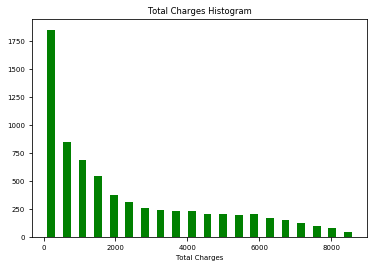

In [14]:
#Total Charges histogram

total = data['TotalCharges']
num_bins = 20

n, bins, patches = plt.hist(total, num_bins, facecolor='green',rwidth=0.5)


plt.xlabel('Total Charges')

plt.title('Total Charges Histogram')


plt.show()

### Binarizing the features

In [15]:
# Transform categorical features to binary features
# We look at the various features and see which are binary

for feature in features:
    print(feature)
    print(data[feature].unique())
    print("Number of unique variables: " + str(len(data[feature].unique())))
    print()

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Number of unique variables: 7043

gender
['Female' 'Male']
Number of unique variables: 2

SeniorCitizen
[0 1]
Number of unique variables: 2

Partner
['Yes' 'No']
Number of unique variables: 2

Dependents
['No' 'Yes']
Number of unique variables: 2

tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Number of unique variables: 73

PhoneService
['No' 'Yes']
Number of unique variables: 2

MultipleLines
['No phone service' 'No' 'Yes']
Number of unique variables: 3

InternetService
['DSL' 'Fiber optic' 'No']
Number of unique variables: 3

OnlineSecurity
['No' 'Yes' 'No internet service']
Number of unique variables: 3

OnlineBackup
['Yes' 'No' 'No internet service']
Number of unique variables: 3

DeviceProtection
['No' 'Y

In [16]:
#We notice that the categorical variable with the most number of possible values is 4 (PaymentMethod)

featuresToBinarize = []
for feature in features:
    if len(list(data[feature].unique())) <= 4:
        featuresToBinarize.append(feature)
dummies = []

for feature in featuresToBinarize:
    dummies.append(pd.get_dummies(data[feature], prefix=feature))

for dummy in dummies:
    data = data.join(dummy)
    
data = data.drop(featuresToBinarize, axis = 1)

'''
Since the outcome that we want to know is if the Churn is a Yes or No, we only need one output column for 'Churn'
We can drop one of the two columns ('Churn_No' or 'Churn_Yes')
We will drop the Churn_No column and keep the Churn_Yes column
Hence, a 1 will represent a 'Yes' for Churn and 0 will represent a 'No' for Churn
'''

data = data.drop('Churn_No', axis = 1)

data.head()

,customerID,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,1,29.85,29.85,1,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0
1,5575-GNVDE,34,56.95,1889.50,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,3668-QPYBK,2,53.85,108.15,0,1,1,0,1,0,...,1,0,0,0,1,0,0,0,1,1
3,7795-CFOCW,45,42.30,1840.75,0,1,1,0,1,0,...,0,1,0,1,0,1,0,0,0,0
4,9237-HQITU,2,70.70,151.65,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,1


# We need to choose a baseline model to work from.

## Some possible baseline models:
    - Decision Tree (Entropy)
    - Decision Tree (Gini)
    - Logistic Regression (L1)
    - Logistic Regression (L2)
    
## Subsequently, when we have decided on a baseline model to work with, we can then cross-valide on various Ensemble learning models and decide which to use

    - Bagging
    - Adaboost
    - Gradient Boost
    - RandomForest

# Cross validation (k fold) to reduce overfitting and to tune hyperparameters

In [17]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

C:\Users\Chiran\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### k-fold cross validation on all models with Synthetic Minority Oversampling Technique (SMOTE) applied on the training set

### As seen from the visualizations above, the data is imbalanced/skewed, in that for our output column of "Churn", only 26.5% of the entries have "Yes" and 73.5% are "No". SMOTE helps us to balance the data set.  

In [18]:
features = list(data)[1:-1]
target = list(data)[-1]

# 10-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=12345)

# Tranform dataframe to array
data_feature = data.iloc[:,1:-1] #We dont include the customerID
data_target = data.iloc[:,-1] #Only the churn_yes is the target output

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=12345)
# Split train data: 70% for model fit, 30% for validation
X_train, X_valid, y_train, y_valid = train_test_split(data_feature,
                                                      data_target,
                                                      test_size=0.3,
                                                      random_state=12345,
                                                      stratify = data_target #Important to stratify
                                                     )



## We will apply SMOTE only on the training data as we do not wish to taint the test data. We will not touch the test data (X_valid, y_valid) until we have finalized a model.

In [19]:
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Churn_yes'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of Churn == 'No' in oversampled data: ",len(os_data_y[os_data_y['Churn_yes']==0]))
print("Number of Churn == 'Yes': ",len(os_data_y[os_data_y['Churn_yes']==1]))
print("Proportion of No Churn data in oversampled data is: ",len(os_data_y[os_data_y['Churn_yes']==0])/len(os_data_X))
print("Proportion of Churn data in oversampled data is: ",len(os_data_y[os_data_y['Churn_yes']==1])/len(os_data_X))

length of oversampled data is  7244
Number of Churn == 'No' in oversampled data:  3622
Number of Churn == 'Yes':  3622
Proportion of No Churn data in oversampled data is:  0.5
Proportion of Churn data in oversampled data is:  0.5


In [20]:
os_data_y = np.ravel(os_data_y)

In [21]:
#model performance metrics
per_met = ['accuracy','precision','roc_auc','recall']

In [22]:
# Model 1: Single decision tree model (entropy)
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=12345)
dt_ent = decision_tree.fit(os_data_X, os_data_y)
dt_feature_importance = dt_ent.feature_importances_

features_impt_dict = {}

for i in range(len(dt_feature_importance)):
    features_impt_dict[features[i]] = float(dt_feature_importance[i])

sorted_features = sorted(features_impt_dict.items(), key=lambda kv: kv[1], reverse = True)
#Top 5 features
print("Top 5 most important features are: ")
for i in range(5):
    print(sorted_features[i])


dt_ent_models = {}
# Cross validation on Model 1
for per in per_met:
    dt_ent_models[per] = cross_val_score(decision_tree, os_data_X, os_data_y, cv=kf, scoring=per).mean()

# Report performance of Model 1
print()
print("Single decision tree model (entropy): ")
for k,v in dt_ent_models.items():
    print(k + ": " + str(v))

 

Top 5 most important features are: 
('Contract_Month-to-month', 0.2332588190317425)
('TotalCharges', 0.1393929894621885)
('MonthlyCharges', 0.11829652371300761)
('PaymentMethod_Electronic check', 0.1150945600259429)
('tenure', 0.07702037153530854)

Single decision tree model (entropy): 
accuracy: 0.8139169365593446
precision: 0.8111993565080035
roc_auc: 0.8147949211579416
recall: 0.8173171835161888


In [23]:
# Model 2: Single decision tree model (gini)
decision_tree_gini = DecisionTreeClassifier(criterion='gini', random_state=12345)
dt_gini = decision_tree_gini.fit(os_data_X, os_data_y)
dt_feature_importance_gini = dt_gini.feature_importances_

features_impt_gini_dict = {}

for i in range(len(dt_feature_importance)):
    features_impt_gini_dict[features[i]] = float(dt_feature_importance_gini[i])

sorted_features_gini = sorted(features_impt_gini_dict.items(), key=lambda kv: kv[1], reverse = True)
#Top 5 features
print("Top 5 most important features are: ")
for i in range(5):
    print(sorted_features_gini[i])

dt_gini_models = {}
# Cross validation on Model 2
for per in per_met:
    dt_gini_models[per] = cross_val_score(decision_tree_gini, os_data_X, os_data_y, cv=kf, scoring=per).mean()

# Report performance of Model 2
print()
print("Single decision tree model (gini): ")
for k,v in dt_gini_models.items():
    print(k + ": " + str(v))

Top 5 most important features are: 
('Contract_Month-to-month', 0.2966013672849578)
('TotalCharges', 0.1354959116053809)
('MonthlyCharges', 0.10098924064519206)
('OnlineSecurity_No', 0.09126512905247593)
('tenure', 0.06654502604984887)

Single decision tree model (gini): 
accuracy: 0.8103274909506574
precision: 0.8055706563620291
roc_auc: 0.8109519145440004
recall: 0.8174722844271525


In [24]:
# Model 3: LogisticRegression method with L1 regularization
LR1 = LogisticRegression(fit_intercept=True, max_iter=1000, tol=2e-9, penalty='l1', C=100, random_state=12345)
L1_model = LR1.fit(os_data_X, os_data_y)
L1_FI = np.std(np.ravel(os_data_X), 0)*L1_model.coef_

L1_FI_dict = {}

for i in range(len(L1_FI[0])):
    L1_FI_dict[features[i]] = float(L1_FI[0][i])

sorted_L1_FI = sorted(L1_FI_dict.items(), key=lambda kv: abs(kv[1]), reverse = True)
#Top 5 features
print("Top 5 most important features are: ")
for i in range(5):
    print(sorted_L1_FI[i])

# Cross validation on Model 3
LR1_models = {}

for per in per_met:
    LR1_models[per] = cross_val_score(LR1, os_data_X, os_data_y, cv=kf, scoring=per).mean()

# Report performance of Model 3
print()
print("LogisticRegression method with L1 regularization model: ")
for k,v in LR1_models.items():
    print(k + ": " + str(v))



Top 5 most important features are: 
('InternetService_Fiber optic', 1203.2464505674063)
('StreamingMovies_Yes', 497.6025136279306)
('PhoneService_Yes', 469.5025114725946)
('StreamingTV_Yes', 444.8042721771381)
('OnlineBackup_Yes', 439.28920606510854)

LogisticRegression method with L1 regularization model: 
accuracy: 0.7762282339493237
precision: 0.7569950224432402
roc_auc: 0.8560299068807954
recall: 0.8138843643690222


In [25]:
# Model 4: LogisticRegression method with L2 regularization
LR2 = LogisticRegression(fit_intercept=True, max_iter=1000, tol=2e-9, penalty='l2', C=100, random_state=12345)
L2_model = LR2.fit(os_data_X, os_data_y)
L2_FI = np.std(np.ravel(os_data_X), 0)*L2_model.coef_

L2_FI_dict = {}

for i in range(len(L2_FI[0])):
    L2_FI_dict[features[i]] = float(L2_FI[0][i])

sorted_L2_FI = sorted(L2_FI_dict.items(), key=lambda kv: abs(kv[1]), reverse = True)
#Top 5 features
print("Top 5 most important features are: ")
for i in range(5):
    print(sorted_L2_FI[i])
    
# Cross validation on Model 4
LR2_models = {}

for per in per_met:
    LR2_models[per] = cross_val_score(LR2, os_data_X, os_data_y, cv=kf, scoring=per).mean()

# Report performance of Model 4
print()
print("LogisticRegression method with L2 regularization model: ")
for k,v in LR2_models.items():
    print(k + ": " + str(v))

Top 5 most important features are: 
('InternetService_Fiber optic', 805.1873408293235)
('StreamingMovies_Yes', 451.64548490795977)
('StreamingTV_Yes', 425.280011468507)
('InternetService_DSL', -400.16527591158456)
('Contract_Month-to-month', 361.00703172441456)

LogisticRegression method with L2 regularization model: 
accuracy: 0.7762282339493237
precision: 0.7569950224432402
roc_auc: 0.8560368085685782
recall: 0.8138843643690222


In [26]:
base_model_results = {}
base_model_results['Decision Tree Entropy'] = dt_ent_models
base_model_results['Decision Tree Gini'] = dt_gini_models
base_model_results['Logistic Regression L1'] = LR1_models
base_model_results['Logistic Regression L2'] = LR2_models

base_model_results = pd.DataFrame(base_model_results)
base_model_results = base_model_results.transpose()


In [27]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [28]:
base_model_results.style.apply(highlight_max)

,accuracy,precision,recall,roc_auc
Decision Tree Entropy,0.813917,0.811199,0.817317,0.814795
Decision Tree Gini,0.810327,0.805571,0.817472,0.810952
Logistic Regression L1,0.776228,0.756995,0.813884,0.85603
Logistic Regression L2,0.776228,0.756995,0.813884,0.856037


## From the above table, we see that the Decision Tree (Entropy) is a good candidate for a baseline model after we do cross validation on 10 folds using the training data.

# Testing Ensemble learning models using cross validation

    - Bagging
    - Adaboost
    - Gradient Boost
    - RandomForest
    
## We will set the base model for the ensemble learning models to be a DecisionTree(entropy)

In [29]:
# Model 5: Bagging method
BA = BaggingClassifier(base_estimator = DecisionTreeClassifier(criterion='entropy'),
                       n_estimators=100, 
                       random_state=12345)
BA_model = BA.fit(os_data_X, os_data_y)

BA_FI = np.mean([
    tree.feature_importances_ for tree in BA_model.estimators_
], axis=0)

BA_FI_dict = {}

for i in range(len(BA_FI)):
    BA_FI_dict[features[i]] = float(BA_FI[i])

sorted_BA_FI = sorted(BA_FI_dict.items(), key=lambda kv: kv[1], reverse = True)
#Top 5 features
print("Top 5 most important features are: ")
for i in range(5):
    print(sorted_BA_FI[i])

bag_models = {}
# Cross validation on Model 5
for per in per_met:
    bag_models[per] = cross_val_score(BA, os_data_X, os_data_y, cv=kf, scoring=per).mean()

# Report performance of Model 5
print()
print("Bagging model: ")
for k,v in bag_models.items():
    print(k + ": " + str(v))



Top 5 most important features are: 
('Contract_Month-to-month', 0.23259876562142248)
('TotalCharges', 0.12759332815484853)
('MonthlyCharges', 0.12241642687266173)
('PaymentMethod_Electronic check', 0.09488472639588012)
('tenure', 0.08146987484050441)

Bagging model: 
accuracy: 0.8532610020956373
precision: 0.8728684508690314
roc_auc: 0.9337945374676032
recall: 0.8263400840112611


In [30]:
# Model 6: Random Forest method
random_forest = RandomForestClassifier(criterion='entropy',n_estimators=100, random_state=12345)
rf_model = random_forest.fit(os_data_X, os_data_y)
rf_FI =rf_model.feature_importances_

rf_FI_dict = {}

for i in range(len(rf_FI)):
    rf_FI_dict[features[i]] = float(rf_FI[i])

sorted_rf_FI = sorted(rf_FI_dict.items(), key=lambda kv: kv[1], reverse = True)
#Top 5 features
print("Top 5 most important features are: ")
for i in range(5):
    print(sorted_rf_FI[i])


# Cross validation on Model 6
forest_models = {}

for per in per_met:
    forest_models[per] = cross_val_score(random_forest, os_data_X, os_data_y, cv=kf, scoring=per).mean()

# Report performance of Model 6
print()
print("Forest model: ")
for k,v in forest_models.items():
    print(k + ": " + str(v))


Top 5 most important features are: 
('TotalCharges', 0.10353964159319373)
('tenure', 0.0920476358290529)
('MonthlyCharges', 0.08473111355280928)
('PaymentMethod_Electronic check', 0.06624332317797768)
('Contract_Month-to-month', 0.06499861119966205)

Forest model: 
accuracy: 0.8524345589636122
precision: 0.8755518527553591
roc_auc: 0.9349843201659102
recall: 0.8202887095374832


In [31]:
# Model 7: AdaBoosting method
Adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=1),n_estimators=80, random_state=12345)
ab_model = Adaboost.fit(os_data_X, os_data_y)
ab_FI =ab_model.feature_importances_

ab_FI_dict = {}

for i in range(len(ab_FI)):
    ab_FI_dict[features[i]] = float(ab_FI[i])

sorted_ab_FI = sorted(ab_FI_dict.items(), key=lambda kv: kv[1], reverse = True)
#Top 5 features
print("Top 5 most important features are: ")
for i in range(5):
    print(sorted_ab_FI[i])

# Cross validation on Model 7
boost_models = {}

for per in per_met:
    boost_models[per] = cross_val_score(Adaboost, os_data_X, os_data_y, cv=kf, scoring=per).mean()

# Report performance of Model 7
print()
print("Adaboost model: ")
for k,v in boost_models.items():
    print(k + ": " + str(v))



Top 5 most important features are: 
('TotalCharges', 0.0875)
('gender_Female', 0.0875)
('gender_Male', 0.075)
('tenure', 0.0625)
('SeniorCitizen_0', 0.0625)

Adaboost model: 
accuracy: 0.8580908744522766
precision: 0.863171760693316
roc_auc: 0.94124249184694
recall: 0.8507375327409525


In [32]:
# Model 8: GradientBoosting method
Gradientboost = GradientBoostingClassifier(loss = 'exponential',
                                           learning_rate = 0.1,
                                           n_estimators=100, 
                                           random_state=12345
                                           )
gb_model = Gradientboost.fit(os_data_X, os_data_y)
gb_FI =gb_model.feature_importances_

gb_FI_dict = {}

for i in range(len(gb_FI)):
    gb_FI_dict[features[i]] = float(gb_FI[i])

sorted_gb_FI = sorted(gb_FI_dict.items(), key=lambda kv: kv[1], reverse = True)
#Top 5 features
print("Top 5 most important features are: ")
for i in range(5):
    print(sorted_gb_FI[i])

# Cross validation on Model 8
gb_boost_models = {}

for per in per_met:
    gb_boost_models[per] = cross_val_score(Gradientboost, os_data_X, os_data_y, cv=kf, scoring=per).mean()

# Report performance of Model 8
print()
print("Gradientboost model: ")
for k,v in gb_boost_models.items():
    print(k + ": " + str(v))


Top 5 most important features are: 
('TotalCharges', 0.18946633381216105)
('MonthlyCharges', 0.10174277201983503)
('tenure', 0.08502272113350172)
('PaymentMethod_Electronic check', 0.061000641708318974)
('Contract_Month-to-month', 0.05544307013172919)

Gradientboost model: 
accuracy: 0.8605791579348446
precision: 0.8676643877663228
roc_auc: 0.943866798211082
recall: 0.850115923814186


In [33]:
model_results = {}

model_results['Bagging'] = bag_models
model_results['Random Forest'] = forest_models
model_results['Adaboost'] = boost_models
model_results['GradientBoost'] = gb_boost_models

model_results = pd.DataFrame(model_results)
model_results = model_results.transpose()

model_results.style.apply(highlight_max)

,accuracy,precision,recall,roc_auc
Bagging,0.853261,0.872868,0.82634,0.933795
Random Forest,0.852435,0.875552,0.820289,0.934984
Adaboost,0.858091,0.863172,0.850738,0.941242
GradientBoost,0.860579,0.867664,0.850116,0.943867


## It appears that after cross-validation, the GradientBoost model seems to have performed the best out of the other ensemble learning models. 

Highest accuracy, 2nd highest recall (slightly less than Adaboost) and highest ROC-AUC score

### Testing our model on our test data (X_valid, y_valid)


In [34]:
# Get predicted scores Pr(y=1): Used as thresholds for calculating TP Rate and FP Rate
score = gb_model.predict_proba(X_valid)[:, 1]
print(score)

acc = gb_model.score(X_valid, y_valid)
print(acc)

[0.85213482 0.16311806 0.08915784 ... 0.67574195 0.25775913 0.01415714]
0.7931850449597728


0.8409998254222026


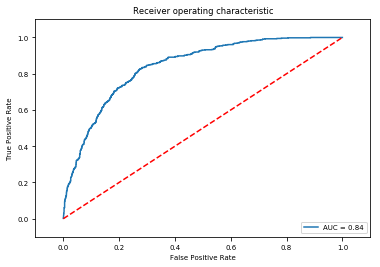

In [35]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_valid, score) # fpr: FP Rate, tpr: TP Rate, thresholds: Pr(y=1)
roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.title('Receiver operating characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [36]:
gb_pred = gb_model.predict(X_valid)
cm = confusion_matrix(y_valid, gb_pred)
TN, FP, FN, TP = cm.ravel()
print(cm)
accuracy = (TP+TN)/(TP+TN+FP+FN)
recall = TP / (TP + FN) #need to lower false negatives
precision = TP / (TP + FP)
print()
print("Accuracy: " + str(accuracy))
print("Recall: "+ str(recall))
print("Precision: " + str(precision))
print("ROC-AUC: "+ str(roc_auc_score(y_valid, score)))

[[1339  213]
 [ 224  337]]

Accuracy: 0.7931850449597728
Recall: 0.6007130124777184
Precision: 0.6127272727272727
ROC-AUC: 0.8409998254222026


### We see from the results above that the Accuracy is quite high but the "Recall", which is a feature of importance is quite low. Recall score helps us to see how well this model can predict a true positive, hence we will attempt to further fine tune the model to improve the Recall score.

Telco companies are more interested in True Positives, and a high recall score will help with that, as the model will be better able to predict when Churn = "Yes"
We will also fine tune our model to prevent overfitting.

In [37]:
Gradientboost = GradientBoostingClassifier(loss = 'exponential',
                                           learning_rate = 0.01, #shrinking learning rate to prevent overfitting
                                           n_estimators=80, #modified n_estimators
                                           random_state=12345,
                                           max_features = 0.5, #additional features
                                           subsample = 0.5 #additional features
                                           )
gb_model = Gradientboost.fit(os_data_X, os_data_y)

[[1193  359]
 [ 148  413]]

Accuracy: 0.7600567912920019
Recall: 0.7361853832442068
Precision: 0.5349740932642487
ROC-AUC: 0.8409998254222026


Text(0.5,0,'False Positive Rate')

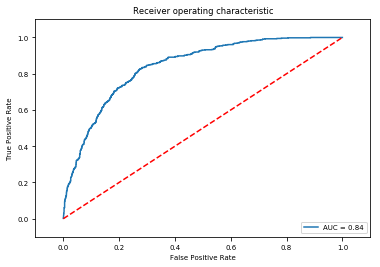

In [38]:
gb_pred = gb_model.predict(X_valid)
cm = confusion_matrix(y_valid, gb_pred)
TN, FP, FN, TP = cm.ravel()
print(cm)
accuracy = (TP+TN)/(TP+TN+FP+FN)
recall = TP / (TP + FN) #need to lower false negatives
precision = TP / (TP + FP)
print()
print("Accuracy: " + str(accuracy))
print("Recall: "+ str(recall))
print("Precision: " + str(precision))
print("ROC-AUC: "+ str(roc_auc_score(y_valid, score)))

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_valid, score) # fpr: FP Rate, tpr: TP Rate, thresholds: Pr(y=1)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.title('Receiver operating characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## As seen above, there is an improvement in the Recall score (13% improvement) with the tradeoff being lower accuracy (3% lower)

In [39]:
#Final model

gb_model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='exponential', max_depth=3,
              max_features=0.5, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=80,
              presort='auto', random_state=12345, subsample=0.5, verbose=0,
              warm_start=False)

In [43]:
gb_FI = gb_model.feature_importances_

feature_importance = {}

for i in range(len(features)):
    feature_importance[features[i]] = gb_FI[i]


In [46]:
sorted_FI = sorted(feature_importance.items(), key=lambda kv: kv[1], reverse = True)


## The table below shows the features of importance according to our model

In [47]:
pd.DataFrame(sorted_FI, columns = ("Feature", "Influence"))

,Feature,Influence
0,Contract_Month-to-month,0.319177
1,OnlineSecurity_No,0.164070
2,PaymentMethod_Electronic check,0.156626
3,TechSupport_No,0.145835
4,OnlineBackup_No,0.026304
5,tenure,0.024824
6,OnlineSecurity_Yes,0.018228
7,TotalCharges,0.016866
8,PaperlessBilling_No,0.015404
9,DeviceProtection_No,0.015315


### End Note

I hope you have enjoyed reading this notebook.